<a href="https://colab.research.google.com/github/SurajJadhav-5/Heart_Disease_Prediction_Viz/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import files
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.decomposition import PCA


In [3]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data = data.drop(data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].index)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       290 non-null    int64  
 1   sex       290 non-null    int64  
 2   cp        290 non-null    int64  
 3   trestbps  290 non-null    int64  
 4   chol      290 non-null    int64  
 5   fbs       290 non-null    int64  
 6   restecg   290 non-null    int64  
 7   thalach   290 non-null    int64  
 8   exang     290 non-null    int64  
 9   oldpeak   290 non-null    float64
 10  slope     290 non-null    int64  
 11  ca        290 non-null    int64  
 12  thal      290 non-null    int64  
 13  target    290 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.0 KB


In [8]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = data['target']
X = data[columns]
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is ", accuracy_dt)

Decision Tree accuracy is  0.7671232876712328


[Text(710.7857142857143, 1306.7307692307693, 'X[12] <= 2.5\ngini = 0.498\nsamples = 217\nvalue = [101, 116]'),
 Text(478.28571428571433, 1202.1923076923076, 'X[11] <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [34, 98]'),
 Text(318.8571428571429, 1097.6538461538462, 'X[9] <= 2.55\ngini = 0.227\nsamples = 92\nvalue = [12, 80]'),
 Text(212.57142857142858, 993.1153846153846, 'X[0] <= 57.5\ngini = 0.185\nsamples = 87\nvalue = [9, 78]'),
 Text(106.28571428571429, 888.5769230769231, 'X[12] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(53.142857142857146, 784.0384615384615, 'X[2] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(26.571428571428573, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(79.71428571428572, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(159.42857142857144, 784.0384615384615, 'X[3] <= 109.0\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(132.85714285714286, 679.5, 'X[9] <= 0.3\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 T

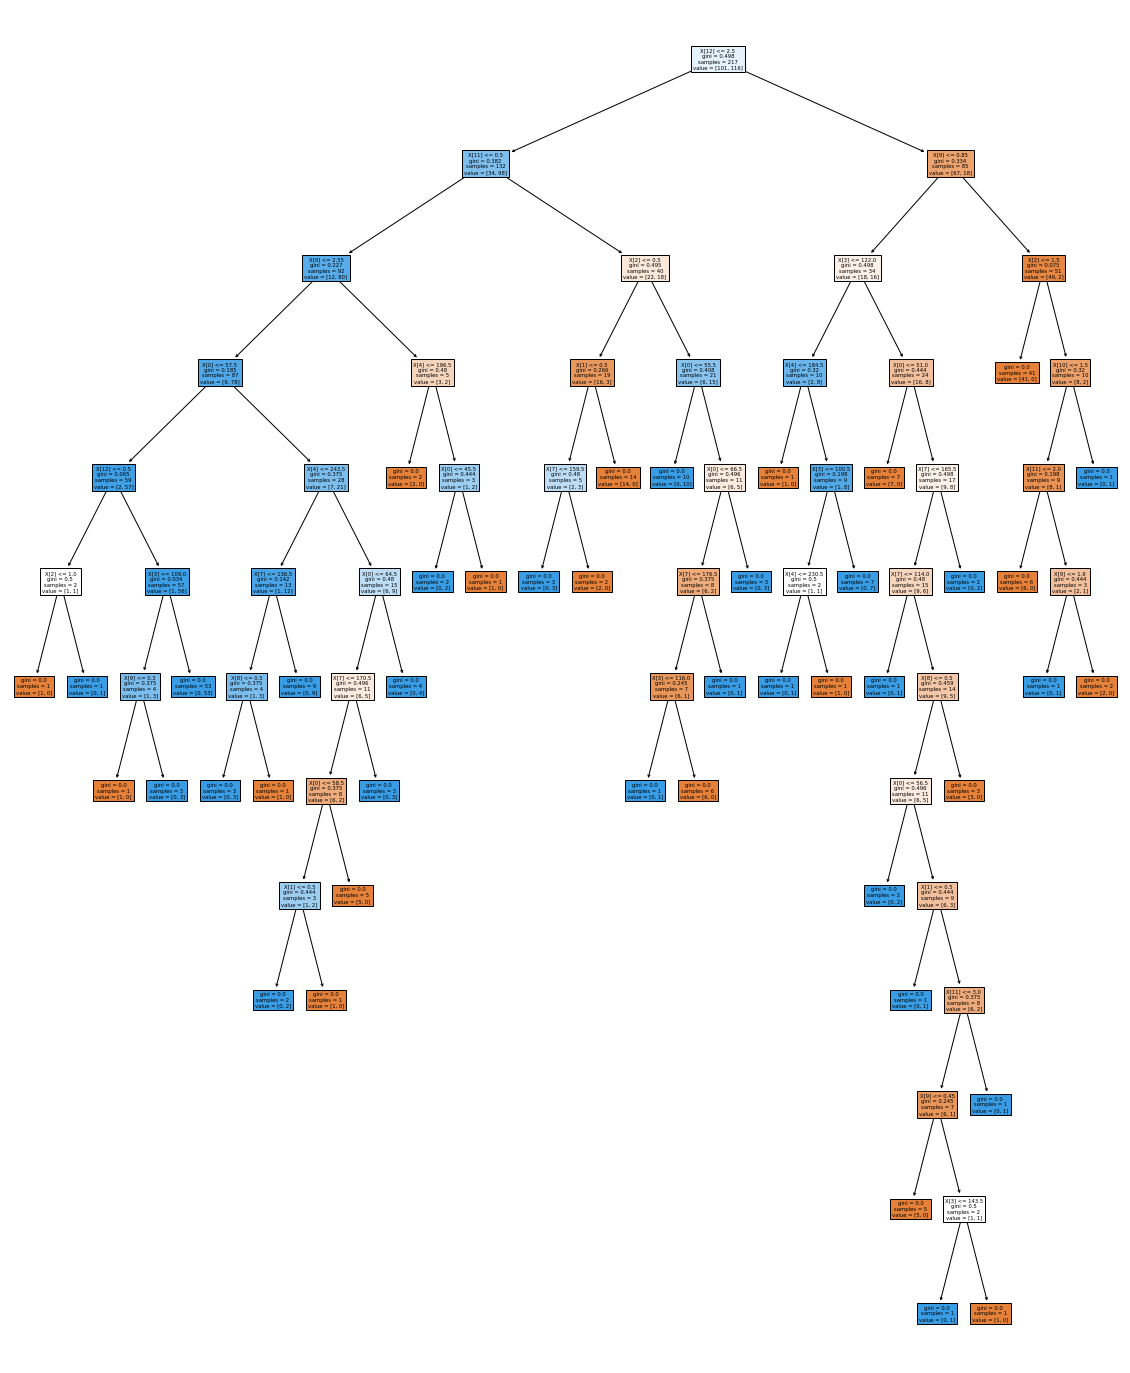

In [10]:
figure = plt.figure(figsize =(20, 25))
# _ = tree.plot_tree(decision_tree, feature_names=data[columns], class_names=data.target, filled=True)
tree.plot_tree(decision_tree, filled=True)

In [11]:
text_representation = tree.export_text(decision_tree, feature_names=columns)
print(text_representation)

|--- thal <= 2.50
|   |--- ca <= 0.50
|   |   |--- oldpeak <= 2.55
|   |   |   |--- age <= 57.50
|   |   |   |   |--- thal <= 0.50
|   |   |   |   |   |--- cp <= 1.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cp >  1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- thal >  0.50
|   |   |   |   |   |--- trestbps <= 109.00
|   |   |   |   |   |   |--- oldpeak <= 0.30
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- oldpeak >  0.30
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  109.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- age >  57.50
|   |   |   |   |--- chol <= 243.50
|   |   |   |   |   |--- thalach <= 136.50
|   |   |   |   |   |   |--- exang <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- exang >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- thalach >  136.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >

In [13]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
names = data.columns
pd.DataFrame(scaled_data, columns = names).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.987774,0.654654,1.967839,0.932050,-0.201649,2.464380,-1.029565,0.009910,-0.687082,1.150011,-2.313027,-0.709686,-2.121429,0.901388
1,-1.877873,0.654654,0.995653,-0.020810,0.177067,-0.405782,0.896718,1.645853,-0.687082,2.212404,-2.313027,-0.709686,-0.489560,0.901388
2,-1.437004,-1.527525,0.023467,-0.020810,-0.847695,-0.405782,-1.029565,0.982633,-0.687082,0.353215,0.959060,-0.709686,-0.489560,0.901388
3,0.216254,0.654654,0.023467,-0.656049,-0.134817,-0.405782,0.896718,1.247921,-0.687082,-0.177981,0.959060,-0.709686,-0.489560,0.901388
4,0.326471,-1.527525,-0.948719,-0.656049,2.493921,-0.405782,0.896718,0.584701,1.455431,-0.355047,0.959060,-0.709686,-0.489560,0.901388
